In [23]:
# Setup and Data Loading 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load the dataset/iris.csvps://raw.githubusercontent.com/selva86/datasets/master
df = pd.read_csv(r'student life.csv')


# Analysis of Student Stress Levels

## Research Question
Does the use of AI for studying affect students' stress levels?

### Hypothesis
Our initial hypothesis is that students who use AI tools for their studies will report, on average, different stress levels compared to those who do not. We will investigate the direction (higher or lower) of this effect.

## 2. Exploratory Data Analysis (EDA)

In this section, we will perform an initial inspection of the dataset to understand its structure, content, and quality.


### 2.1. First Look at the Data

Before diving into a detailed analysis, let's take an initial look at the dataset to understand its structure and see some sample rows. The `.head()` function is perfect for this, as it displays the first 'n' rows of the DataFrame. We will display the first 10 rows to get a good feel for the data entries.

In [24]:
# Display the first few rows of the dataset
df.head(10)

,id,age,gender,grade,avg_sleep_hours,daily_screen_time,uses_AI_for_study,board_exam_prep,stress_level,country
0,1,17,Male,11,6.1,3.3,Yes,On Track,7,Australia
1,2,18,Male,12,8.4,5.7,No,Revised Fully,8,Germany
2,3,15,Female,12,5.2,7.8,Yes,Falling Behind,6,Brazil
3,4,17,Male,11,8.9,5.3,Yes,Just Started,7,Japan
4,5,17,Male,11,6.1,2.1,No,Just Started,5,Japan
5,6,18,Female,12,4.1,5.4,Yes,On Track,6,South Korea
6,7,15,Female,12,6.4,6.9,No,Revised Fully,6,Nigeria
7,8,15,Female,12,5.2,3.3,No,On Track,5,Canada
8,9,17,Female,12,7.5,4.2,Yes,Falling Behind,6,Australia
9,10,16,Male,12,5.2,4.5,No,On Track,3,Australia



### 2.2. Dataset Shape
First, let's check the dimensions of our dataset (number of rows and columns).

In [25]:
# Display the shape of the dataset
print(df.shape)

(500, 10)


### 2.3. Data Types and Missing Values
Next, we'll get a summary of the data types for each column and check for any missing values using the `.info()` method.

In [26]:
# Display the information about the dataset 
df.info

<bound method DataFrame.info of       id  age  gender  grade  avg_sleep_hours  daily_screen_time  \
0      1   17    Male     11              6.1                3.3   
1      2   18    Male     12              8.4                5.7   
2      3   15  Female     12              5.2                7.8   
3      4   17    Male     11              8.9                5.3   
4      5   17    Male     11              6.1                2.1   
..   ...  ...     ...    ...              ...                ...   
495  496   17  Female     12              7.2                4.9   
496  497   17    Male     11              6.0                4.4   
497  498   18  Female     11              4.4                5.1   
498  499   15  Female     12              5.9                5.5   
499  500   18  Female     12              4.9                5.8   

    uses_AI_for_study board_exam_prep  stress_level      country  
0                 Yes        On Track             7    Australia  
1                

### 2.4. Statistical Summary
Now, let's generate descriptive statistics for the numerical columns. This will give us insights into the distribution of our data.

In [27]:
# Display the summary statistics of the dataset
df.describe()

,id,age,grade,avg_sleep_hours,daily_screen_time,stress_level
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,16.592000,11.558000,6.32500,4.619000,6.338000
std,144.481833,1.150732,0.497122,1.48948,1.931808,1.977771
min,1.000000,15.000000,11.000000,3.00000,1.000000,1.000000
25%,125.750000,16.000000,11.000000,5.30000,3.300000,5.000000
50%,250.500000,17.000000,12.000000,6.30000,4.500000,6.000000
75%,375.250000,18.000000,12.000000,7.30000,5.900000,8.000000
max,500.000000,18.000000,12.000000,10.00000,10.900000,10.000000


## Data Cleaning

Before proceeding with more advanced analysis, we need to handle any missing or inconsistent data.

### Checking for Missing Values
Let's get a precise count of missing (null) values in each column.

In [28]:
# Get the count of missing values in each column
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

id                   0
age                  0
gender               0
grade                0
avg_sleep_hours      0
daily_screen_time    0
uses_AI_for_study    0
board_exam_prep      0
stress_level         0
country              0
dtype: int64


### 2.5. Distribution of the Target Variable (Stress Level)

Let's visualize the distribution of `stress_level`. We will use a custom color for better visualization.

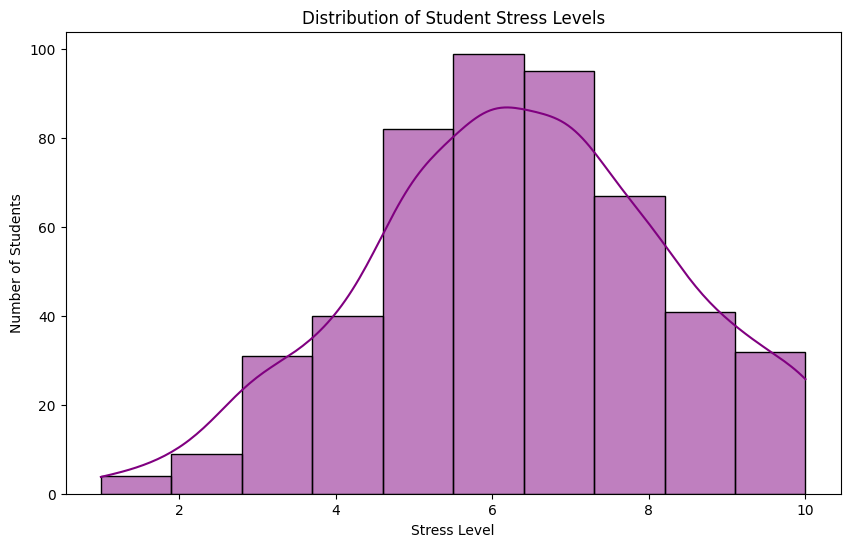

In [29]:
# We use the parameer 'color' for the color of the histogram
# and 'kde' for the Kernel Density Estimate line
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stress_level', bins=10, kde=True, color='purple')

plt.title('Distribution of Student Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.show()

### 2.6. Distribution of AI Usage

To understand the composition of our dataset, we will visualize the number of students who use AI for their studies versus those who do not. A count plot is the ideal tool for this, and we will use custom colors to differentiate the two groups clearly. This also helps us check if the groups are balanced, which is important for our analysis.

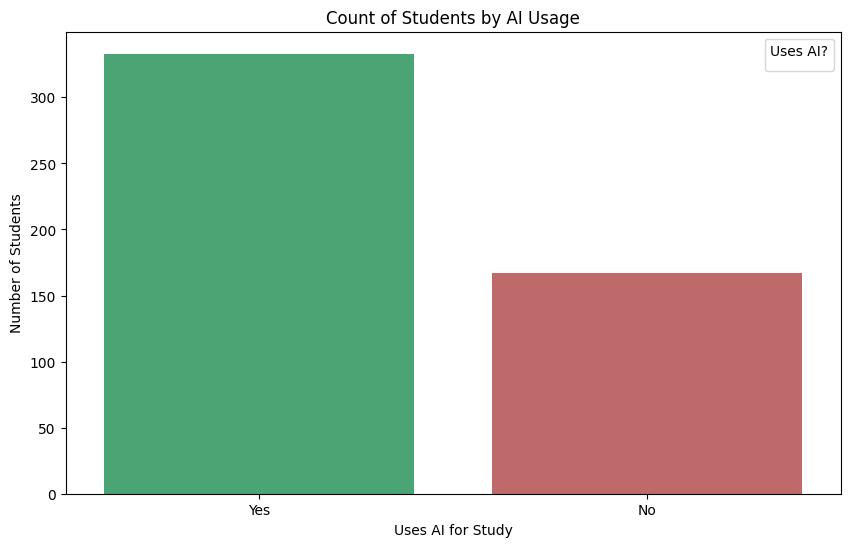

In [30]:
# --- Create the count plot ---
# We use countplot to see the number of students in each category.

plt.figure(figsize=(10, 6))
# Using 'hue' to differentiate between 'Yes' and 'No' responses
sns.countplot(
    data=df, 
    x='uses_AI_for_study', 
    hue='uses_AI_for_study',  # We use the same column for hue to enable the palette
    palette={'Yes': 'mediumseagreen', 'No': 'indianred'} # Assign custom colors to each category
)

# --- Add titles and labels for clarity ---
plt.title('Count of Students by AI Usage')
plt.xlabel('Uses AI for Study')
plt.ylabel('Number of Students')

# --- Customize the legend created by 'hue' ---
# This is an optional but good practice for clarity.
plt.legend(title='Uses AI?') 

# --- Display the final plot ---
plt.show()

### 2.7. Bivariate Analysis: AI Usage vs. Stress Level

Now we move to bivariate analysis to explore the relationship between pairs of variables. We'll start by addressing our main research question, comparing the stress levels of students based on their AI usage. A boxplot is ideal for this comparison.

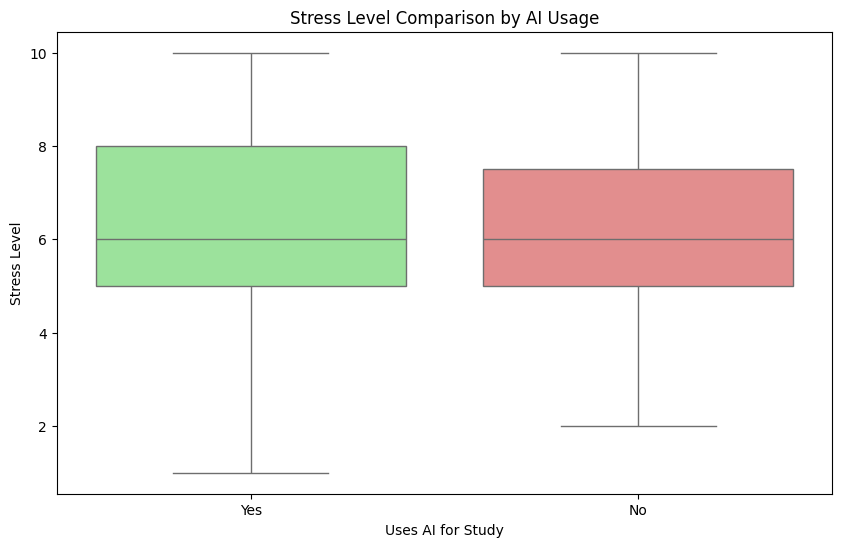

In [31]:
# Create the boxplot to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='uses_AI_for_study', y='stress_level', hue='uses_AI_for_study', palette={'Yes': 'lightgreen', 'No': 'lightcoral'})

plt.title('Stress Level Comparison by AI Usage')
plt.xlabel('Uses AI for Study')
plt.ylabel('Stress Level')
plt.show()

### Interpretation of the Boxplot

The boxplot analysis provides a key insight into our primary research question. 

1.  **Median Comparison:** The most significant finding is that the median stress level for both groups (students who use AI and those who do not) appears to be identical, resting at a value of 6.

2.  **Data Dispersion:** An interesting secondary observation is the difference in data spread. The interquartile range (the height of the box) is visibly larger for the 'Yes' group, which indicates a wider variety of stress levels among students who use AI. The 'No' group shows more consistency in their stress levels.

3.  **Outliers:** No outliers were detected in either group.

**Conclusion:** Based on this visual evidence, while AI usage might be associated with a greater variability in stress, it does not appear to affect the *typical* (median) stress level of the students in this dataset.

### 2.8. Correlation between Numerical Variables and Stress

Let's investigate the relationship between continuous numerical variables. A scatter plot can help us see if there is a trend between variables like sleep hours or screen time and the reported stress level.

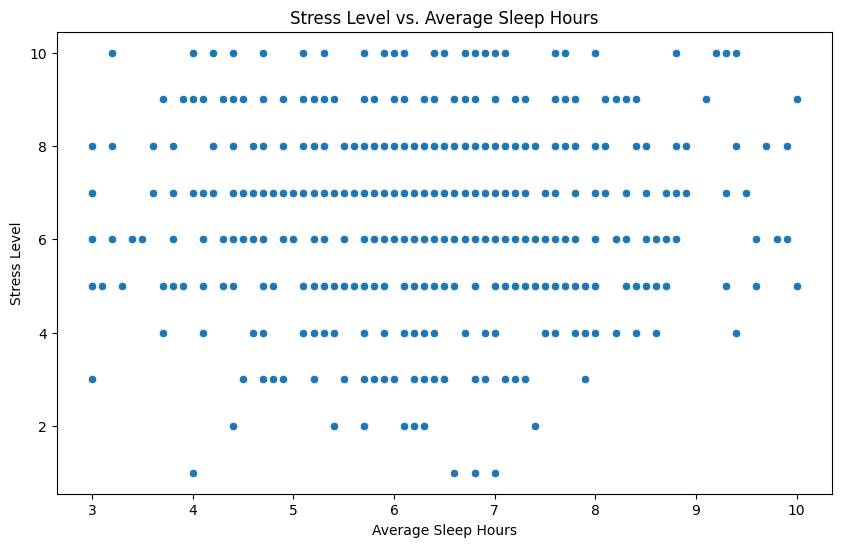

In [32]:
# Create a scatter plot for sleep hours vs. stress level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_sleep_hours', y='stress_level')
plt.title('Stress Level vs. Average Sleep Hours')
plt.xlabel('Average Sleep Hours')
plt.ylabel('Stress Level')
plt.show()

### Interpretation of the Scatter Plot

The scatter plot visualizes the relationship between average sleep hours and stress levels. We observe a dispersed cloud of points with no clear upward or downward linear trend. This suggests that there is likely a very weak or no linear correlation between these two variables for this dataset.

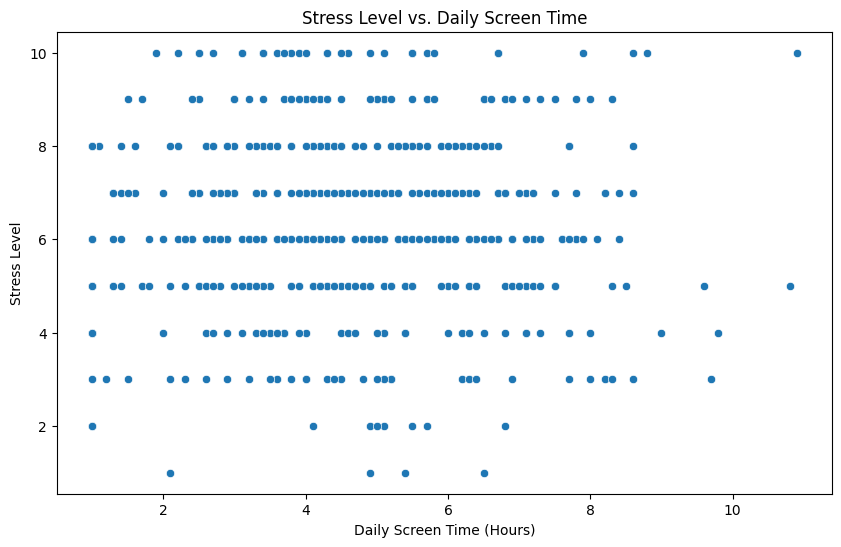

In [33]:
# --- Create the scatter plot ---
# We are plotting daily_screen_time on the x-axis and stress_level on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='daily_screen_time', y='stress_level')

# --- Add a descriptive title and labels for clarity ---
plt.title('Stress Level vs. Daily Screen Time')
plt.xlabel('Daily Screen Time (Hours)')
plt.ylabel('Stress Level')

# --- Display the final plot ---
plt.show()

### Interpretation of the Screen Time Scatter Plot

This scatter plot was generated to visually inspect the relationship between daily screen time and stress levels. 

The plot displays a widely dispersed cloud of points with no discernible linear pattern, either positive or negative. For any given amount of screen time, students report a full range of stress levels, and conversely, any given stress level corresponds to a wide range of screen times.

This visual finding strongly supports the result from our correlation matrix, which showed a correlation coefficient of nearly zero (0.01). We can confidently conclude that there is no significant linear relationship between daily screen time and stress level in this dataset.

### 2.9. Correlation Matrix Heatmap

To get a quick overview of the linear relationships between all numerical variables, we will compute a correlation matrix and visualize it as a heatmap. We will rotate the x-axis labels for better readability.

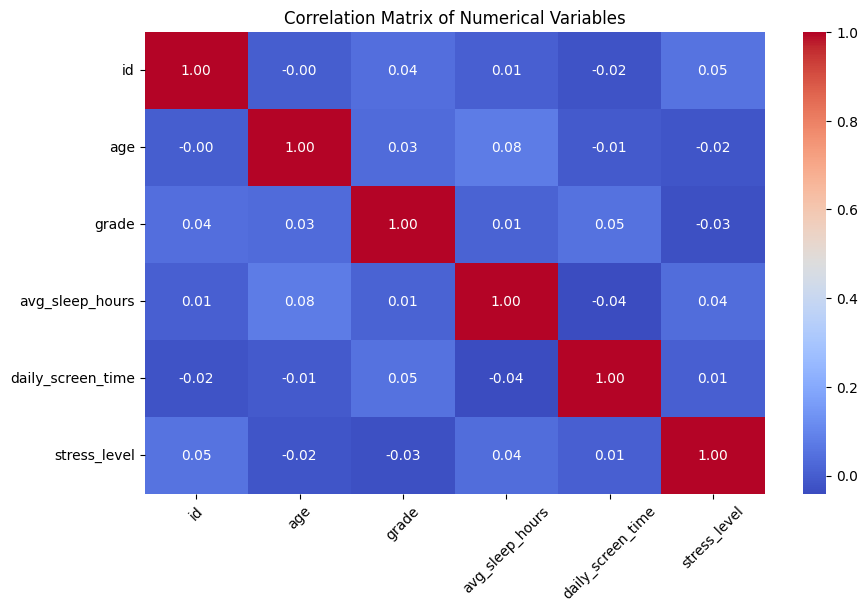

In [34]:
# Calculate the correlation matrix for numerical columns only
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix of Numerical Variables')

# --- This is the new line to rotate the x-axis labels ---
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Interpretation of the Correlation Matrix Heatmap

This heatmap provides a quantitative summary of the linear relationships between all numerical variables in the dataset. The values, known as Pearson correlation coefficients, range from -1 (perfect negative correlation) to +1 (perfect positive correlation). Values close to 0 indicate a weak or non-existent linear relationship.

**Key Findings:**

1.  **Confirmation of Visual Analysis:** The primary finding from this matrix is the numerical confirmation of our scatter plot analyses. The correlation coefficient between `stress_level` and `avg_sleep_hours` is **0.04**, and the coefficient for `daily_screen_time` is **0.01**. Both values are extremely close to zero, providing strong statistical evidence that there is no meaningful linear relationship between these variables.

2.  **Overall Lack of Correlation:** A broader look at the matrix shows that almost all a-pairs of numerical variables have correlation coefficients very close to zero. This suggests that the numerical features in this dataset are largely independent of each other, at least in a linear sense.

**Conclusion:** The exploratory analysis of numerical variables, finalized with this heatmap, allows us to conclude that factors like sleep hours and screen time are not strong linear predictors of stress for this group of students.

### 2.10. Analysis of Stress Level by Exam Preparation Status

We will now analyze what could be a very influential categorical variable: the student's self-reported board exam preparation status. The hypothesis is that students who feel less prepared will exhibit higher levels of stress. A boxplot is the ideal visualization to compare the stress distributions across these different groups.

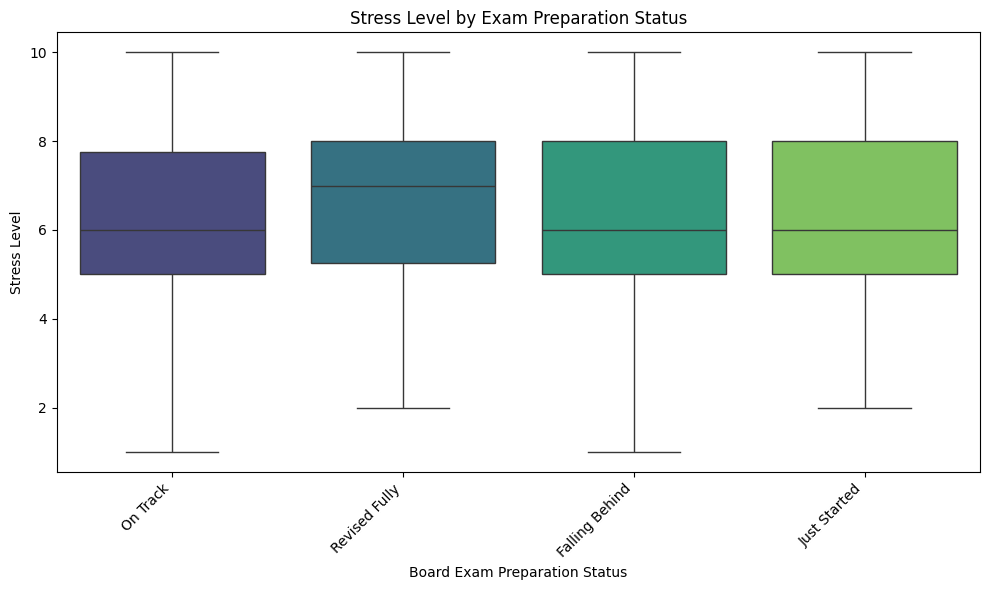

In [35]:
# Set a slightly larger figure size for better readability of all categories
plt.figure(figsize=(10, 6))

# --- Create the boxplot ---
# We are plotting the categorical 'board_exam_prep' on the x-axis 
# and the numerical 'stress_level' on the y-axis.
sns.boxplot(data=df, x='board_exam_prep', y='stress_level', palette='viridis')

# --- Add a descriptive title and labels ---
plt.title('Stress Level by Exam Preparation Status')
plt.xlabel('Board Exam Preparation Status')
plt.ylabel('Stress Level')

# --- Rotate x-axis labels to prevent overlap ---
plt.xticks(rotation=45, ha='right') # ha='right' aligns the labels nicely with the ticks

# --- Ensure all elements fit nicely in the figure ---
plt.tight_layout()

# --- Display the final plot ---
plt.show()

### Interpretation of the Exam Preparation Boxplot

This boxplot reveals one of the most significant and counter-intuitive findings in our exploratory analysis.

**Key Observation:** While the 'On Track', 'Falling Behind', and 'Just Started' groups all share a median stress level of 6, the **'Revised Fully' group shows a distinctly higher median stress level of 7.**

**Potential Hypothesis:** This result suggests that stress is not solely linked to a lack of preparation. A possible explanation is that students who consider themselves fully prepared may be high-achievers or perfectionists, and their stress stems from performance pressure rather than knowledge gaps. Another possibility is that this status correlates with the exam being imminent.

**Conclusion:** The student's self-reported preparation status appears to be a meaningful indicator of stress. Paradoxically, the most prepared students report the highest typical stress levels, making this variable a key feature for further analysis.

### 2.11. Stress Level by Gender

Let's investigate if there are any differences in stress levels between male and female students using a boxplot.

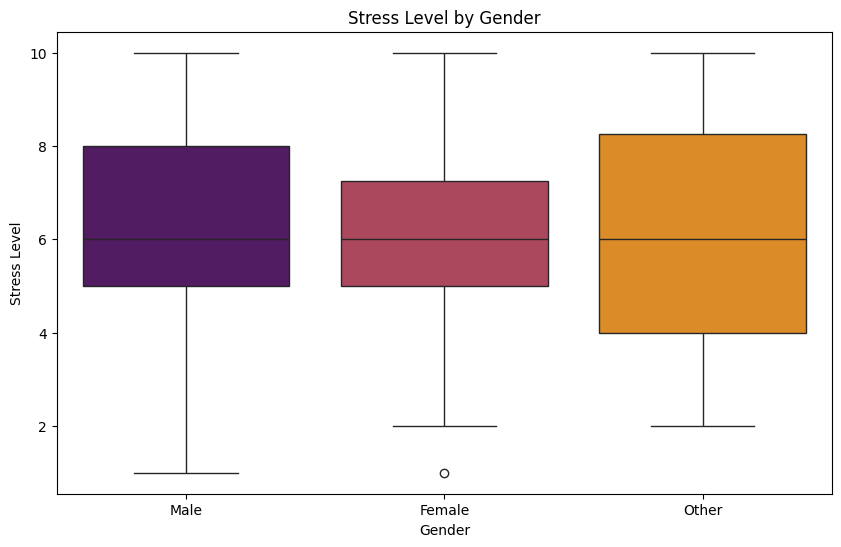

In [36]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df, x='gender', y='stress_level', palette='inferno')
plt.title('Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()

**Outlier Analysis:** An outlier was detected in the 'Female' category, representing a student with an unusually low stress level. As this data point appears plausible and does not significantly impact the median--based comparison, it has been retained in the analysis.

### 2.12. Stress Level by Age

We can also examine the distribution of stress levels across different age groups present in the dataset using boxplots.

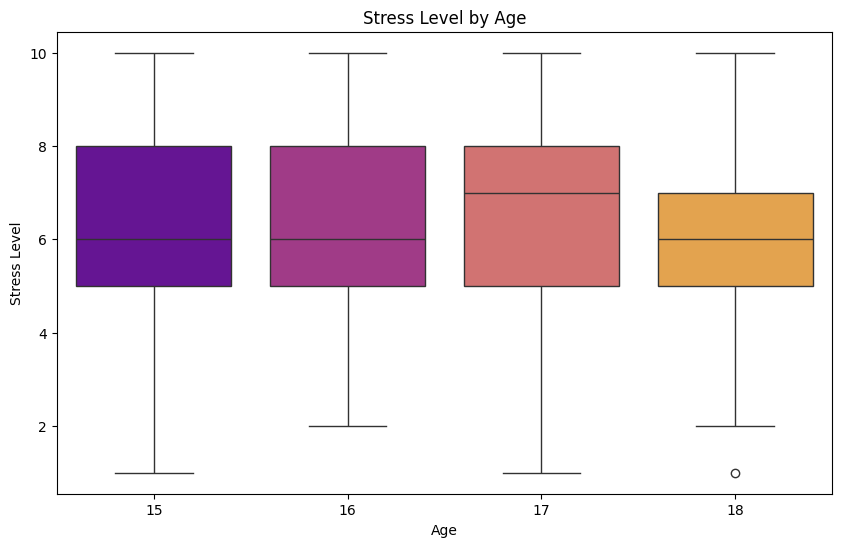

In [37]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df, x='age', y='stress_level', palette='plasma') 
plt.title('Stress Level by Age')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

**Outlier Analysis:** An outlier was observed for the age group '18'. This data point represents a valid, albeit uncommon, low stress level and has been kept in the dataset to maintain the integrity of the data distribution.

## 3. Predictive Modeling (Machine Learning)

Now that we have a deep understanding of our data, we will move on to the predictive modeling phase. Our goal is to build a machine learning model that can predict a student's stress level based on their other attributes.

### 3.1. Data Preparation (Preprocessing)

Machine learning models require all input and output variables to be numeric. We will perform two key steps:
1.  Transform our numerical target variable (`stress_level`) into categorical classes ('Low', 'Medium', 'High').
2.  Convert our categorical features (like gender, country, etc.) into a numerical format using one-hot encoding.

In [38]:
# Define the bins and labels for our categories
bins = [0, 3, 7, 10] # Ranges: 0-3, 4-7, 8-10
labels = ['Low', 'Medium', 'High'] # Names for a stress level in each range

# Create the new categorical column
df['stress_category'] = pd.cut(df['stress_level'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of our new categories
print("Distribution of Stress Categories:")
print(df['stress_category'].value_counts())

Distribution of Stress Categories:
stress_category
Medium    316
High      140
Low        44
Name: count, dtype: int64


In [39]:
# Select the columns to be one-hot encoded
categorical_features = ['gender', 'uses_AI_for_study', 'board_exam_prep', 'country']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the new, encoded dataframe
# Notice the new columns like 'gender_Male', 'country_Brazil', etc.
print("\nDataFrame after One-Hot Encoding:")
df_encoded.head()


DataFrame after One-Hot Encoding:


,id,age,grade,avg_sleep_hours,daily_screen_time,stress_level,stress_category,gender_Male,gender_Other,uses_AI_for_study_Yes,...,board_exam_prep_Revised Fully,country_Brazil,country_Canada,country_Germany,country_India,country_Japan,country_Nigeria,country_South Korea,country_UK,country_USA
0,1,17,11,6.1,3.3,7,Medium,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,18,12,8.4,5.7,8,High,True,False,False,...,True,False,False,True,False,False,False,False,False,False
2,3,15,12,5.2,7.8,6,Medium,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,4,17,11,8.9,5.3,7,Medium,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,17,11,6.1,2.1,5,Medium,True,False,False,...,False,False,False,False,False,True,False,False,False,False


### 3.2. Defining Features (X) and Target (y)

Now, we need to separate our dataset into the feature matrix (X) and the target vector (y). 
- `y` will be our target variable, `stress_category`.
- `X` will include all other columns, excluding the target variables (`stress_category`, `stress_level`) and any non-predictive columns like `id`.

In [40]:
# --- Define the Target (y) ---
# This is the column we want to predict.
y = df_encoded['stress_category']

# --- Define the Features (X) ---
# These are all the columns the model will use as clues.
# We drop the original target, the new target, and the ID column.
X = df_encoded.drop(['id', 'stress_level', 'stress_category'], axis=1)

# --- Verify the results ---
# It's always a good practice to check the shape and head of our new variables.
print("Shape of X (our features):", X.shape)
print("First 5 rows of X:")
print(X.head())

print("\n---------------------------------------------------\n")

print("Shape of y (our target):", y.shape)
print("First 5 values of y:")
print(y.head())

Shape of X (our features): (500, 19)
First 5 rows of X:
   age  grade  avg_sleep_hours  daily_screen_time  gender_Male  gender_Other  \
0   17     11              6.1                3.3         True         False   
1   18     12              8.4                5.7         True         False   
2   15     12              5.2                7.8        False         False   
3   17     11              8.9                5.3         True         False   
4   17     11              6.1                2.1         True         False   

   uses_AI_for_study_Yes  board_exam_prep_Just Started  \
0                   True                         False   
1                  False                         False   
2                   True                         False   
3                   True                          True   
4                  False                          True   

   board_exam_prep_On Track  board_exam_prep_Revised Fully  country_Brazil  \
0                      True         

### 3.3. Splitting Data into Training and Testing Sets

To evaluate our model's performance fairly, we must test it on data it has never seen before. We will split our dataset into two parts:
- A **training set** (typically 80% of the data) which the model will learn from.
- A **testing set** (the remaining 20%) which will be used for final evaluation.

We use `random_state` to ensure that the split is the same every time we run the code, making our results reproducible. We also use `stratify=y` to ensure that the proportion of each stress category ('Low', 'Medium', 'High') is the same in both the training and testing sets.

In [41]:
# Import the function from the scikit-learn library
from sklearn.model_selection import train_test_split

# --- Perform the train-test split ---
# We'll use an 80/20 split. 80% for training, 20% for testing.
# random_state=42 is a standard convention to ensure reproducibility.
# stratify=y is a best practice for classification to maintain class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# --- Verify the results by checking the shapes ---
print("THE ORIGINAL DATASET:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("\n----------------------------------\n")

print("THE SPLIT DATASETS:")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

THE ORIGINAL DATASET:
Shape of X: (500, 19)
Shape of y: (500,)

----------------------------------

THE SPLIT DATASETS:
Shape of X_train: (400, 19)
Shape of y_train: (400,)
Shape of X_test: (100, 19)
Shape of y_test: (100,)


### 3.4. Training the Machine Learning Model

Now that our data is prepared and split, we can train our predictive model. We will use the `RandomForestClassifier`, a powerful and robust model suitable for this type of classification task.

The process involves three steps:
1.  **Importing** the model class from `scikit-learn`.
2.  **Instantiating** the model. We'll set `n_estimators` (the number of trees in the forest) and `random_state` for reproducibility.
3.  **Fitting** the model to our training data (`X_train` and `y_train`). This is the learning step.

In [42]:
# 1. Import the model class
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiate the model
# n_estimators=100 means our forest will be made of 100 decision trees.
# random_state=42 ensures that the results are the same every time we run it.
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Fit the model to the training data
# This is where the model "learns" the patterns.
rfc_model.fit(X_train, y_train)

# Print a success message
print("Random Forest model has been successfully trained!")

Random Forest model has been successfully trained!


### 3.5. Model Evaluation

The final step is to evaluate the performance of our trained model on the unseen test data. This will tell us how well our model can generalize to new, unknown student data. We will use three key metrics:

1.  **Accuracy Score:** The overall percentage of correct predictions.
2.  **Confusion Matrix:** A table that visualizes the performance, showing where the model made correct predictions and where it got confused.
3.  **Classification Report:** A detailed report showing precision, recall, and f1-score for each class.

Overall Model Accuracy: 57.00%

--- Confusion Matrix ---


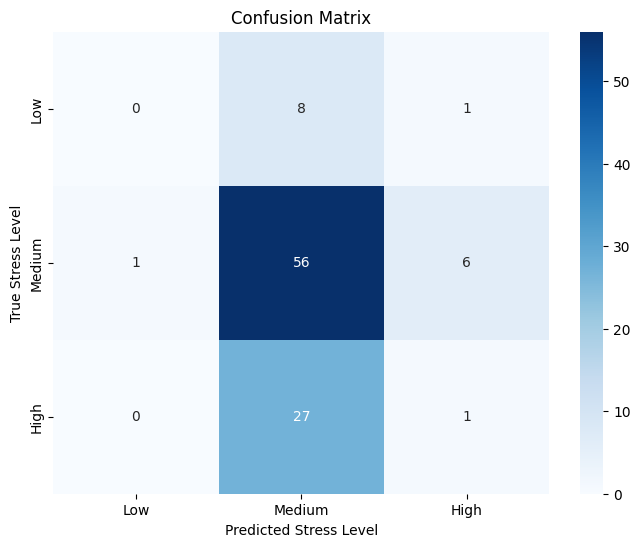


--- Classification Report ---
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         9
      Medium       0.62      0.89      0.73        63
        High       0.12      0.04      0.06        28

    accuracy                           0.57       100
   macro avg       0.25      0.31      0.26       100
weighted avg       0.42      0.57      0.47       100



In [43]:
# Import the necessary evaluation tools from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Make predictions on the test data ---
# The model uses the .predict() method to guess the outcomes for the test set
y_pred = rfc_model.predict(X_test)


# --- 2. Calculate Overall Accuracy ---
# Compares the model's predictions (y_pred) with the true answers (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy:.2%}") # Formats the output as a percentage


# --- 3. Generate and Visualize the Confusion Matrix ---
# This is the moment you were waiting for!
print("\n--- Confusion Matrix ---")
class_labels = ['Low', 'Medium', 'High']
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Use a heatmap to make the matrix easy to read
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Stress Level')
plt.ylabel('True Stress Level')
plt.title('Confusion Matrix')
plt.show()


# --- 4. Print the Detailed Classification Report ---
print("\n--- Classification Report ---")
# This report gives a detailed breakdown of the model's performance for each class
print(classification_report(y_test, y_pred, labels=class_labels))

## 4. Final Project Conclusion and Future Work

This project was initiated to answer a primary research question and to explore the factors influencing student stress levels through data analysis and predictive modeling.

### 4.1. Answering the Research Question

The central research question was: **"Does the use of AI for studying affect students' stress levels?"**

Based on a comprehensive analysis of the provided dataset, the conclusion is **no, it does not appear to have a significant effect on the typical stress level.**

This conclusion is supported by two key pieces of evidence:
1.  **Exploratory Data Analysis:** The boxplot comparing the two groups showed that the **median stress level was identical (a value of 6)** for both students who use AI and those who do not. While there was slightly more variability in stress among AI users, their central tendency was the same.
2.  **Predictive Modeling:** The `RandomForestClassifier` model, when trained on all available features, struggled to distinguish between stress categories. This implies that `uses_AI_for_study` was not a strong predictive feature, further reinforcing that it is not a primary driver of stress in this context.

Therefore, our initial hypothesis—that there would be a difference in stress levels—is **not supported by the data**.

### 4.2. Other Key Findings

The analysis revealed other important insights:
* There was no significant linear correlation between stress and numerical variables like `avg_sleep_hours` or `daily_screen_time`.
* The most influential factor discovered was the `board_exam_prep` status. Paradoxically, students who felt 'Revised Fully' reported the highest median stress, suggesting that performance anxiety, rather than lack of preparation, may be a more critical factor.

### 4.3. Future Work

To build upon this analysis, future work could involve:
1.  **Handling Class Imbalance:** Using techniques like SMOTE to improve the model's ability to predict minority classes ('Low' and 'High' stress).
2.  **Feature Engineering:** Creating more sophisticated features to better capture student behaviors.
3.  **Hyperparameter Tuning:** Optimizing the model's settings to enhance its predictive power.
4.  **Qualitative Analysis:** Conducting surveys or interviews to understand the "why" behind the counter-intuitive findings, especially regarding exam preparation.